In [418]:
#importing all required liabraries

#for pre - Processing tools to access datset
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
from scipy import stats

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#pre-processing tools
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV


#Algo.
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

#Metrics for Evolution
from sklearn.metrics import r2_score


#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif,SelectFromModel

#ensemblib techniques,A
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC,SVR
from sklearn.ensemble import BaggingClassifier

#warnings
import warnings
warnings.filterwarnings('ignore')

In [419]:
#Access database of train and test data from storage
train = pd.read_csv(r"train.csv")

In [420]:
with pd.option_context("display.max_rows",81):display(train.isnull().sum())

#train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [421]:
df=train.copy()

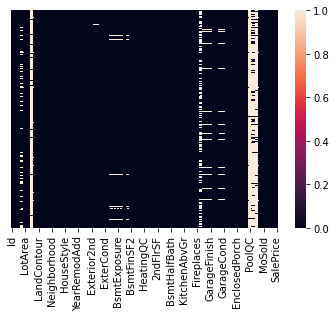

In [422]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [423]:
#missing value analysis

for i in train.columns:
  print(i,"--",np.round(df[i].isnull().mean()*100),"%missing values")

Id -- 0.0 %missing values
MSSubClass -- 0.0 %missing values
MSZoning -- 0.0 %missing values
LotFrontage -- 18.0 %missing values
LotArea -- 0.0 %missing values
Street -- 0.0 %missing values
Alley -- 93.0 %missing values
LotShape -- 0.0 %missing values
LandContour -- 0.0 %missing values
Utilities -- 0.0 %missing values
LotConfig -- 0.0 %missing values
LandSlope -- 0.0 %missing values
Neighborhood -- 0.0 %missing values
Condition1 -- 0.0 %missing values
Condition2 -- 0.0 %missing values
BldgType -- 0.0 %missing values
HouseStyle -- 0.0 %missing values
OverallQual -- 0.0 %missing values
OverallCond -- 0.0 %missing values
YearBuilt -- 0.0 %missing values
YearRemodAdd -- 0.0 %missing values
RoofStyle -- 0.0 %missing values
RoofMatl -- 0.0 %missing values
Exterior1st -- 0.0 %missing values
Exterior2nd -- 0.0 %missing values
MasVnrType -- 1.0 %missing values
MasVnrArea -- 1.0 %missing values
ExterQual -- 0.0 %missing values
ExterCond -- 0.0 %missing values
Foundation -- 0.0 %missing values
Bsm

In [424]:
#Printing features that have >80% NULL values
for i in train.columns:
  if (np.round(df[i].isnull().mean()*100))>=80:
    print(i)

Alley
PoolQC
Fence
MiscFeature


In [425]:
#Dropping the fetures which haveing NULL values more than 80%
df=train.copy()

col = [i for i in df.columns if (np.round(df[i].isnull().mean()*100))>=80]

print(col)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [426]:
df.drop(col,axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
print(train.shape)
print(df.shape)

(1168, 81)
(1168, 76)


In [427]:
#Fill NA values

#Numerical features 
#list of numerical features
num_feature = [i for i in df.columns if df[i].dtypes!='object']

print('Number of numerical variables :- ' , len(num_feature))

with pd.option_context("display.max_columns",len(num_feature)):display(df[num_feature].head(10))


Number of numerical variables :-  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000
5,60,58.0,14054,7,5,2006,2006,0.0,0,0,879,879,879,984,0,1863,0,0,2,1,4,1,9,1,2006.0,3,660,100,17,0,0,0,0,0,11,2006,219210
6,20,NaN,11341,5,6,1957,1996,180.0,1302,0,90,1392,1392,0,0,1392,1,0,1,1,3,1,5,1,1957.0,2,528,0,0,0,0,95,0,0,5,2010,121500
7,20,88.0,13125,5,4,1957,2000,67.0,168,682,284,1134,1803,0,0,1803,1,0,2,0,3,1,8,1,1957.0,2,484,0,0,0,0,0,0,0,1,2006,155000
8,20,70.0,9170,5,7,1965,1965,0.0,698,96,420,1214,1214,0,0,1214,1,0,1,0,2,1,6,0,1965.0,2,461,0,0,184,0,0,0,400,4,2007,140000
9,50,80.0,8480,5,5,1947,1950,0.0,442,0,390,832,832,384,0,1216,0,0,1,0,2,1,6,0,1947.0,1,336,158,0,102,0,0,0,0,10,2008,118500


In [428]:
#list of variables that contain year info.

year_col = [i for i in df.columns if 'Yr' in i or 'Year' in i]

year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [429]:
#Diecrete Features

Disc_var = [i for i in num_feature if df[i].nunique()<25 and i not in year_col]

print("Total no. of Discrete feature in Dataset are {}".format(len(Disc_var)))

Total no. of Discrete feature in Dataset are 17


In [430]:
#Continuous features

cont_var = [i for i in num_feature if i not in Disc_var+year_col]

print("Total no. of Continuous feature in Dataset are {}".format(len(cont_var)))

Total no. of Continuous feature in Dataset are 16


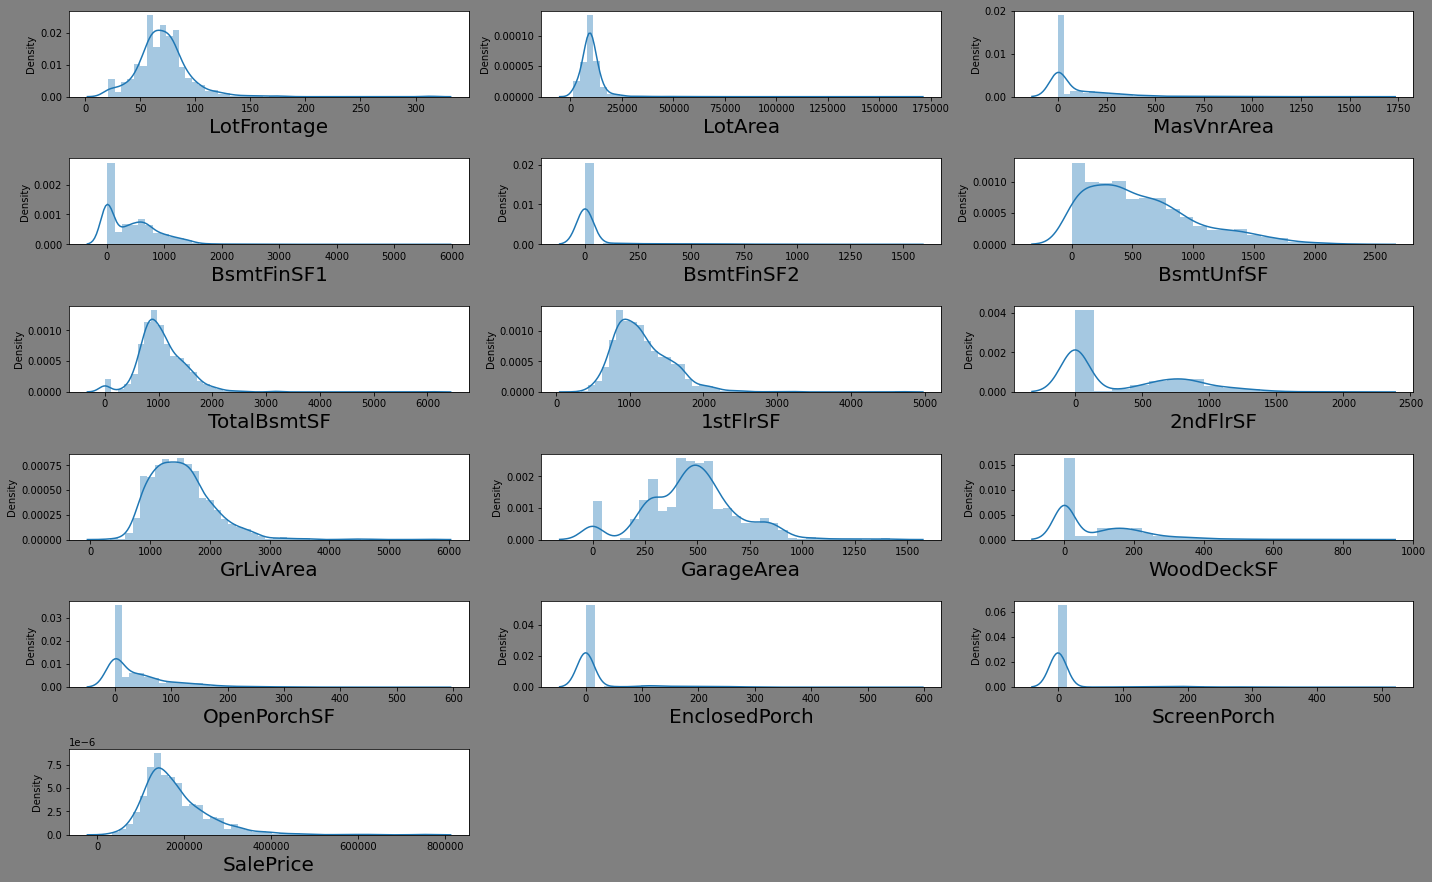

In [431]:
#let see how data is distribute in every Continuous column

plt.figure(figsize=(20,20),facecolor="grey")
plotnumber=1

for i in cont_var:
    if plotnumber<=18:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [432]:
num_nan = [i for i in cont_var if (df[i].isnull().sum())>1]

num_nan

['LotFrontage', 'MasVnrArea']

**Both feature are left skeweed we replace there NaN value by there median**

In [433]:
#fill continuous features NaN value with there respective column median.
# df = train.copy()

for i in cont_var:
  df[i]=df[i].fillna(df[i].median())

for i in cont_var:
  print(i,"--",df[i].isnull().sum())

LotFrontage -- 0
LotArea -- 0
MasVnrArea -- 0
BsmtFinSF1 -- 0
BsmtFinSF2 -- 0
BsmtUnfSF -- 0
TotalBsmtSF -- 0
1stFlrSF -- 0
2ndFlrSF -- 0
GrLivArea -- 0
GarageArea -- 0
WoodDeckSF -- 0
OpenPorchSF -- 0
EnclosedPorch -- 0
ScreenPorch -- 0
SalePrice -- 0


In [434]:
for i in Disc_var:
  print(i,"---",df[i].isnull().sum())

MSSubClass --- 0
OverallQual --- 0
OverallCond --- 0
LowQualFinSF --- 0
BsmtFullBath --- 0
BsmtHalfBath --- 0
FullBath --- 0
HalfBath --- 0
BedroomAbvGr --- 0
KitchenAbvGr --- 0
TotRmsAbvGrd --- 0
Fireplaces --- 0
GarageCars --- 0
3SsnPorch --- 0
PoolArea --- 0
MiscVal --- 0
MoSold --- 0


There is No null values in Discrete variables

In [435]:
#Categorical fetaures which have NAN value

na_feature = [i for i in df.columns if df[i].isnull().sum()>1 if df[i].dtypes=='O']

for i in na_feature:
  print(i,"--",df[i].isnull().sum())

MasVnrType -- 7
BsmtQual -- 30
BsmtCond -- 30
BsmtExposure -- 31
BsmtFinType1 -- 30
BsmtFinType2 -- 31
FireplaceQu -- 551
GarageType -- 64
GarageFinish -- 64
GarageQual -- 64
GarageCond -- 64


In [436]:
#fill categorical features NaN value with there respective column mode.
# df = train.copy()

for i in na_feature:
  df[i]=df[i].fillna(df[i].mode()[0])

for i in na_feature:
  print(i,"--",df[i].isnull().sum())

MasVnrType -- 0
BsmtQual -- 0
BsmtCond -- 0
BsmtExposure -- 0
BsmtFinType1 -- 0
BsmtFinType2 -- 0
FireplaceQu -- 0
GarageType -- 0
GarageFinish -- 0
GarageQual -- 0
GarageCond -- 0


In [437]:
#Year fetaures which have NAN value

for i in year_col:
  print(i,"--",df[i].isnull().sum())

YearBuilt -- 0
YearRemodAdd -- 0
GarageYrBlt -- 64
YrSold -- 0


In [438]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [439]:
df['GarageYrBlt'].isnull().sum()

0

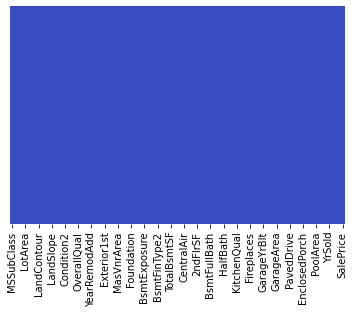

In [440]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [441]:
for i in df.columns:
  if i in cont_var:
    print(i,"---",df[i].skew())

LotFrontage --- 2.7334395986772986
LotArea --- 10.659284548299626
MasVnrArea --- 2.835718180934954
BsmtFinSF1 --- 1.8716059327957582
BsmtFinSF2 --- 4.365829146359866
BsmtUnfSF --- 0.9090571206651619
TotalBsmtSF --- 1.7445908855423957
1stFlrSF --- 1.5137072331415693
2ndFlrSF --- 0.8234785103609108
GrLivArea --- 1.4499515426476701
GarageArea --- 0.18966497539008143
WoodDeckSF --- 1.504929246192858
OpenPorchSF --- 2.41083972347696
EnclosedPorch --- 3.0436098308918846
ScreenPorch --- 4.105740751686475
SalePrice --- 1.953877705368286


In [442]:
for i in df.columns:
  if i in cont_var and df[i].skew() > 0.90:
    print(i,"---",df[i].skew())

LotFrontage --- 2.7334395986772986
LotArea --- 10.659284548299626
MasVnrArea --- 2.835718180934954
BsmtFinSF1 --- 1.8716059327957582
BsmtFinSF2 --- 4.365829146359866
BsmtUnfSF --- 0.9090571206651619
TotalBsmtSF --- 1.7445908855423957
1stFlrSF --- 1.5137072331415693
GrLivArea --- 1.4499515426476701
WoodDeckSF --- 1.504929246192858
OpenPorchSF --- 2.41083972347696
EnclosedPorch --- 3.0436098308918846
ScreenPorch --- 4.105740751686475
SalePrice --- 1.953877705368286


In [443]:
pt =['LotArea','1stFlrSF','GrLivArea','ScreenPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','MasVnrArea']

In [444]:
data=df.copy()

In [445]:
#Removing the otliers by using power transformation
power = PowerTransformer()
for i in pt:
  power = PowerTransformer(method = 'yeo-johnson', standardize=True)
  df[i] = pd.DataFrame(power.fit_transform(df[[i]]))

df['LotFrontage']=np.log(df['LotFrontage'])
df['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])

In [446]:
for i in cont_var:
  print(i,"--",data[i].skew(),"----",df[i].skew())

LotFrontage -- 2.7334395986772986 ---- -0.834336536483773
LotArea -- 10.659284548299626 ---- 0.032508958395610535
MasVnrArea -- 2.835718180934954 ---- 0.4395255589475427
BsmtFinSF1 -- 1.8716059327957582 ---- -0.011788519333937625
BsmtFinSF2 -- 4.365829146359866 ---- 2.3947372888890475
BsmtUnfSF -- 0.9090571206651619 ---- -0.28438996433147495
TotalBsmtSF -- 1.7445908855423957 ---- 0.2867792427041812
1stFlrSF -- 1.5137072331415693 ---- -0.002390937508722813
2ndFlrSF -- 0.8234785103609108 ---- 0.8234785103609108
GrLivArea -- 1.4499515426476701 ---- -5.378878583849997e-05
GarageArea -- 0.18966497539008143 ---- 0.18966497539008143
WoodDeckSF -- 1.504929246192858 ---- 0.11302610201713353
OpenPorchSF -- 2.41083972347696 ---- -0.0027490739886490805
EnclosedPorch -- 3.0436098308918846 ---- 2.0226156539779323
ScreenPorch -- 4.105740751686475 ---- 3.0671533516495986
SalePrice -- 1.953877705368286 ---- 1.953877705368286


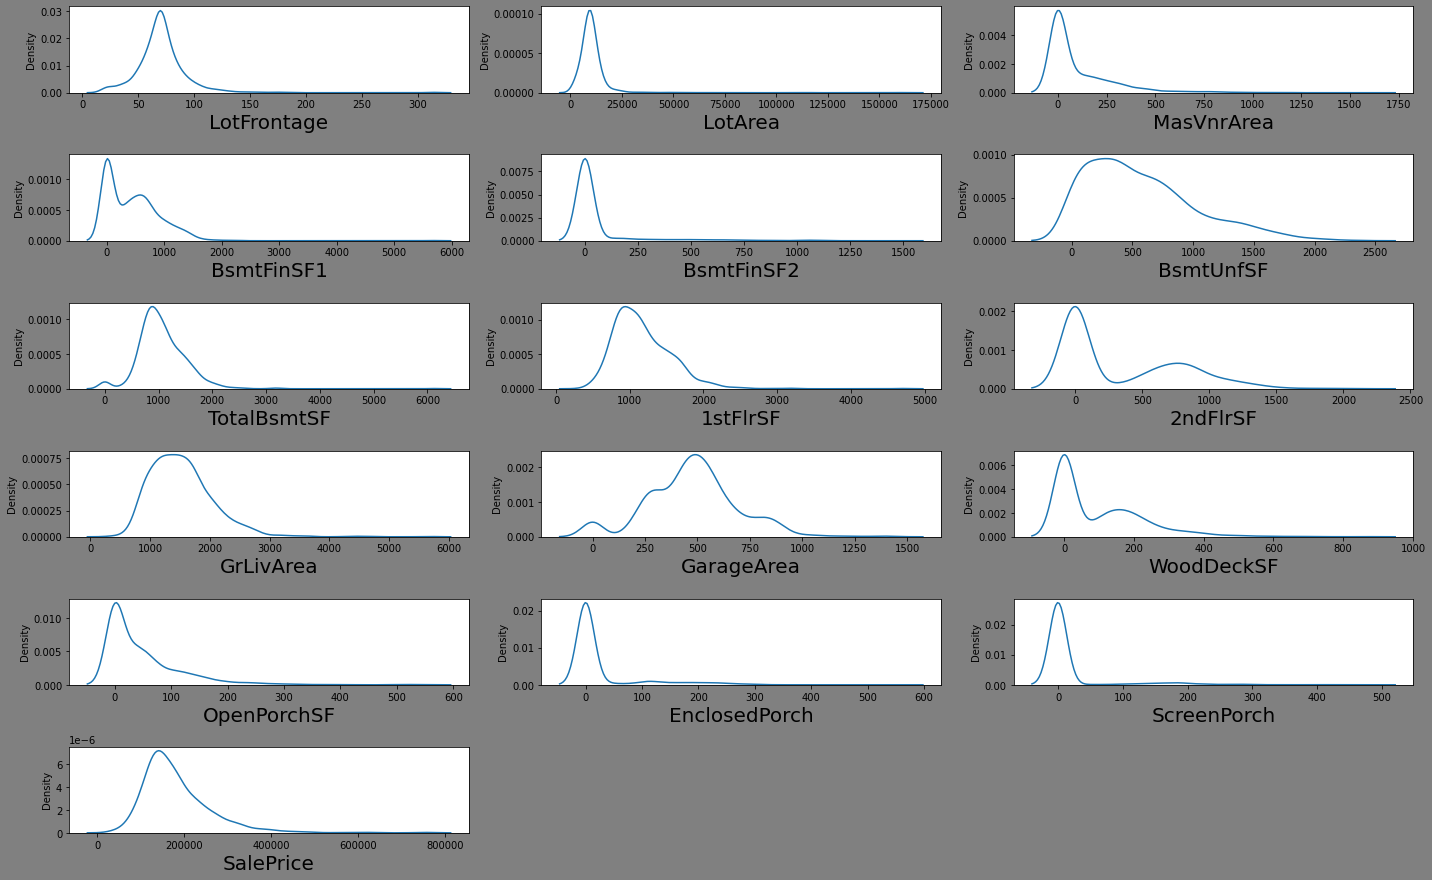

In [447]:
#let see how data is distribute in every Continuous column

plt.figure(figsize=(20,20),facecolor="grey")
plotnumber=1

for i in cont_var:
    if plotnumber<=18:
        ax=plt.subplot(10,3,plotnumber)
        sns.kdeplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

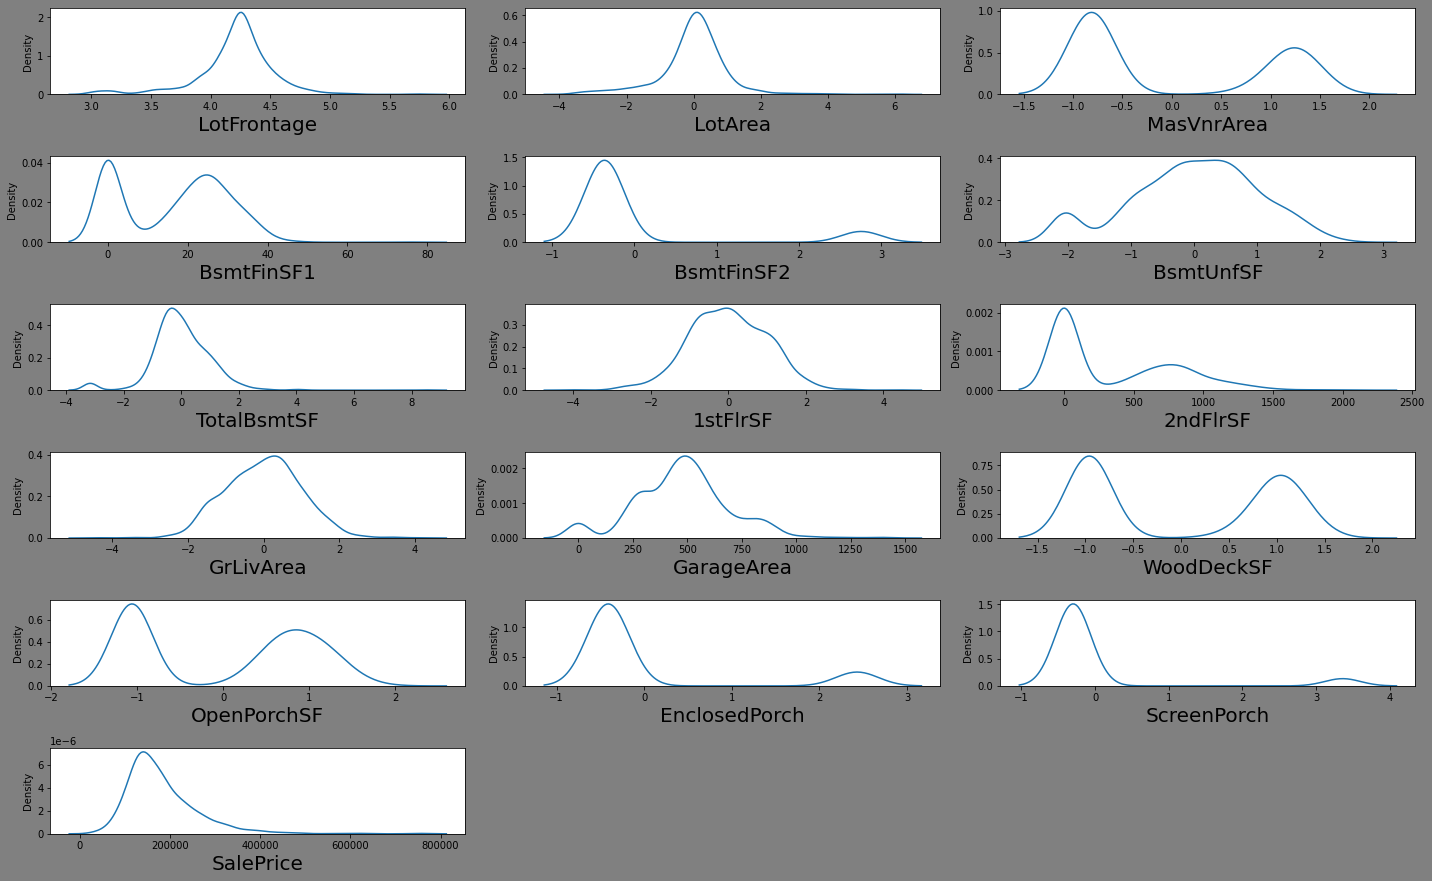

In [448]:
#let see how data is distribute in every Continuous column

plt.figure(figsize=(20,20),facecolor="grey")
plotnumber=1

for i in cont_var:
    if plotnumber<=18:
        ax=plt.subplot(10,3,plotnumber)
        sns.kdeplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Building** **A** **Model**

In [449]:
test_df = pd.read_csv('new_test.csv')
test_df.shape

(292, 75)

In [450]:
df.shape

(1168, 76)

In [451]:
#concat train & test data

final_df = pd.concat([df,test_df],axis=0)
final_df.shape

(1460, 76)

In [452]:
#convert categorical features into OHE

def catgory_onehot_multcols(multicolumns):
  df_final = final_df
  i=0
  for fields in multicolumns:
    print(fields)
    df1 = pd.get_dummies(final_df[fields],drop_first=True)

    final_df.drop([fields],axis=1,inplace=True)
    if i == 0:
      df_final = df1.copy()
    else:
      df_final = pd.concat([df_final,df1],axis = 1)
    i+=1
  df_final = pd.concat([final_df,df_final],axis = 1)

  return df_final

In [453]:
# df.info()
categorical_columns = []

for i in df.columns:
  if df[i].dtype=='O':
    categorical_columns.append(i)

In [454]:
final_df =catgory_onehot_multcols(categorical_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [455]:
final_df.shape

(1460, 237)

In [456]:
# removing the duplicate

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [457]:
#after removing the duplicate entries
final_df.shape

(1460, 177)

In [458]:
#Seperate ttrain & Test data
df_train = final_df.iloc[:1168,:]
df_test = final_df.iloc[1168:,:]

In [459]:
#Remove SalesPrice column from test data bcz Its contain all NAN values
df_test = df_test.drop(['SalePrice'],axis=1)

In [460]:
df_train.shape

(1168, 177)

In [461]:
df_test.shape

(292, 176)

In [462]:
x__train = df_train.drop(['SalePrice'],axis=1)
y__train = df_train['SalePrice']

In [463]:
gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test = train_test_split(x__train,y__train,test_size=0.28)
gb.fit(x_train,y_train)
Train_accurecy = r2_score(y_train,gb.predict(x_train))
Test_accurecy = r2_score(y_test,gb.predict(x_test))
y_pred = gb.predict(x_test)
print(Train_accurecy)
print(Test_accurecy)

0.9732668015693406
0.9170040252407514


Model **Building**

In [464]:
# CROSS VALIDATION

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model,X_train = x_train, Y_train = y_train):
  cv = KFold(n_splits = 10, shuffle = True, random_state =41)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model,X_train,Y_train,cv=cv,scoring = r2)
  score = [r2_val_score.mean()]

  return score

In [465]:
test_model(gb,x__train,y__train)

[0.8699633716708582]

In [466]:
#Cross Validation

cross_validation = cross_val_score(estimator=gb,X=x__train,y=y__train,cv=10)

print("CV Accurecy Score of RF Model :- ",cross_validation)


print("\n\nCV mean Accurecy Score of RF Model :- ",cross_validation.mean())

CV Accurecy Score of RF Model :-  [0.9128197  0.89314124 0.85766498 0.63419001 0.92539378 0.85923398
 0.86266767 0.93600803 0.86343477 0.90420644]


CV mean Accurecy Score of RF Model :-  0.864876060389754


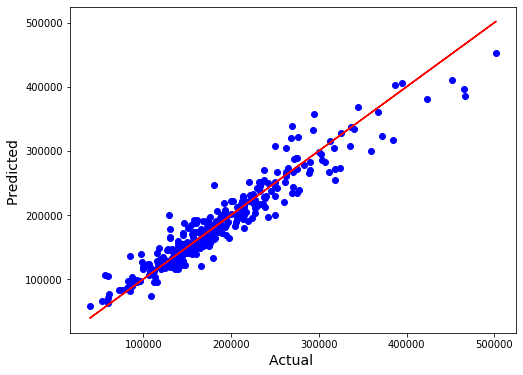

In [467]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=gb.predict(x_test),color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('',fontsize=18)
plt.show()

In [468]:
predictions = gb.predict(x_test)

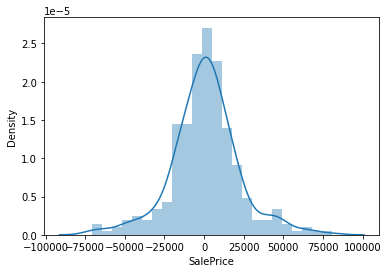

In [469]:
sns.distplot(y_test-predictions)

In [470]:
gb.predict(df_test)

array([348087.88419178, 326071.89805006, 306989.24115429, 275337.75131705,
       275982.63953779, 208159.36344298, 189185.85006699, 316140.9658165 ,
       273659.34557695, 262120.14841744, 144155.98176934, 249648.84456295,
       168971.70929221, 261555.94859222, 316027.73189158, 214429.03530712,
       226440.07353995, 223081.1923457 , 257111.5620658 , 319981.60949233,
       244106.38654585, 235160.40270833, 235789.26145386, 139867.62465325,
       196199.4088557 , 233053.34524513, 252618.47135388, 231490.66664841,
       277487.83330353, 183260.65533122, 202240.97873528, 296096.88383044,
       281567.37308939, 244344.39740184, 212140.6534864 , 278605.00647363,
       236368.97358311, 219999.5691982 , 242975.9754729 , 251890.34781658,
       232788.31950797, 401962.9370984 , 259006.92855259, 290608.4097511 ,
       223762.65211661, 240600.38930922, 215227.20512473, 165662.06802731,
       310844.51638368, 342635.79569174, 237788.70288444, 254513.40961157,
       198300.72905595, 1

Analysis :
After applying PCA we are not getting good score compare to default parameters of Gradient Boosting algorithm with original data without applying PCA on it.which is 86% also With the help of Cross Validation we are getting 86% of score which proves model is not over fitted orr underfitted.